In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(r'D:\research project\Hyperspectral_data_millets_11_varieties.csv')

# 1. Separate features (X) and target (y)
X = data.drop(columns=['Samples', 'Carbohydrate'])  # Hyperspectral data (wavelengths)
y = data['Carbohydrate']  # Carbohydrate values

# 2. Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 5. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# 6. Evaluate the model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R2 Score: {r2_rf}")

# 7. Print actual vs predicted values side-by-side
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})
print(comparison_df)

Mean Squared Error (MSE): 4.074810839303184
R2 Score: 0.7952950345852918
     Actual  Predicted
0     73.73   73.45988
1     73.73   72.88468
2     73.73   73.57352
3     71.92   68.23540
4     67.41   67.41000
..      ...        ...
259   67.81   70.68040
260   67.81   68.10692
261   71.52   70.40608
262   70.92   71.77808
263   69.84   69.62508

[264 rows x 2 columns]


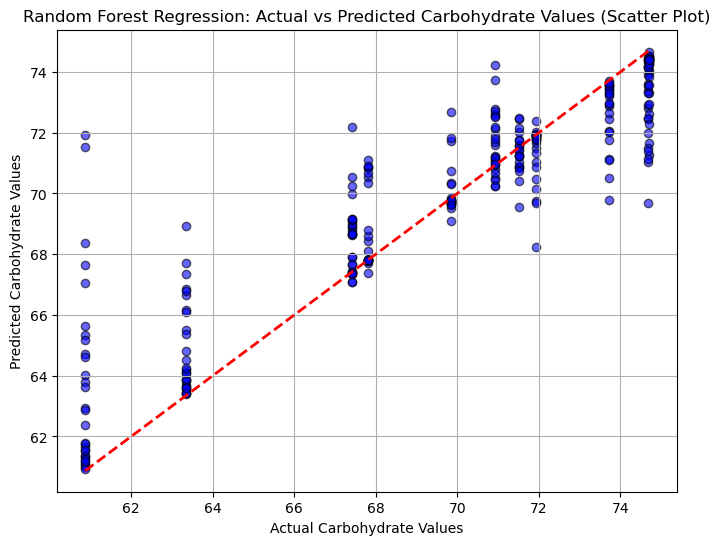

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Carbohydrate Values')
plt.ylabel('Predicted Carbohydrate Values')
plt.title('Random Forest Regression: Actual vs Predicted Carbohydrate Values (Scatter Plot)')
plt.grid(True)
plt.show()

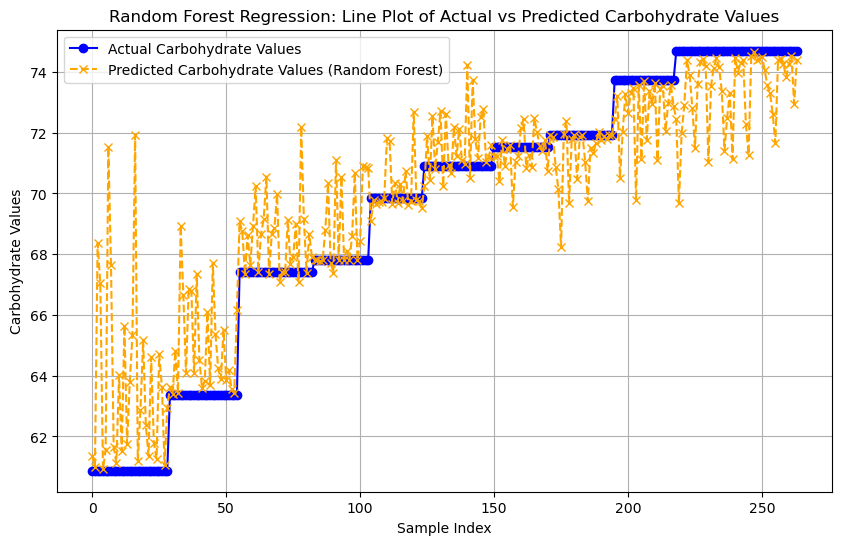

In [10]:
y_test_sorted_idx = y_test.argsort()
y_test_sorted = y_test.iloc[y_test_sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred_rf).iloc[y_test_sorted_idx].reset_index(drop=True)

# Plot actual and predicted values in a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Carbohydrate Values', color='blue', marker='o')
plt.plot(y_pred_sorted, label='Predicted Carbohydrate Values (Random Forest)', color='orange', linestyle='dashed', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Carbohydrate Values')
plt.title('Random Forest Regression: Line Plot of Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()